# Analysis and visualisations
In this notebook look at plotting the positions of different telescopes changes from 2012 to 2019 

In [1]:
from scripts import * 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import networkx as nx

In [2]:
#  load in all the data, clean it, and find the model parameters 
design_mat_04_07, pinv_04_07, y_04_07, beta_04_07 = load_and_clean('2019_04_07')
design_mat_04_08, pinv_04_08, y_04_08, beta_04_08 = load_and_clean('2019_04_08')
design_mat_11_05, pinv_11_05, y_11_05, beta_11_05 = load_and_clean('2019_11_05')
design_mat_11_06, pinv_11_06, y_11_06, beta_11_06 = load_and_clean('2019_11_06')

sigma_04_07 = svd_uncertainty(design_mat_04_07, y_04_07, beta_04_07)[:15].reshape(5,3)
sigma_04_08 = svd_uncertainty(design_mat_04_08, y_04_08, beta_04_08)[:15].reshape(5,3)
sigma_11_05 = svd_uncertainty(design_mat_11_05, y_11_05, beta_11_05)[:15].reshape(5,3)
sigma_11_06 = svd_uncertainty(design_mat_11_06, y_11_06, beta_11_06)[:15].reshape(5,3)

beta_04_07 = beta_04_07[:15].reshape(5,3)
beta_04_08 = beta_04_08[:15].reshape(5,3)
beta_11_05 = beta_11_05[:15].reshape(5,3)
beta_11_06 = beta_11_06[:15].reshape(5,3)

# 2019 Apr-Nov

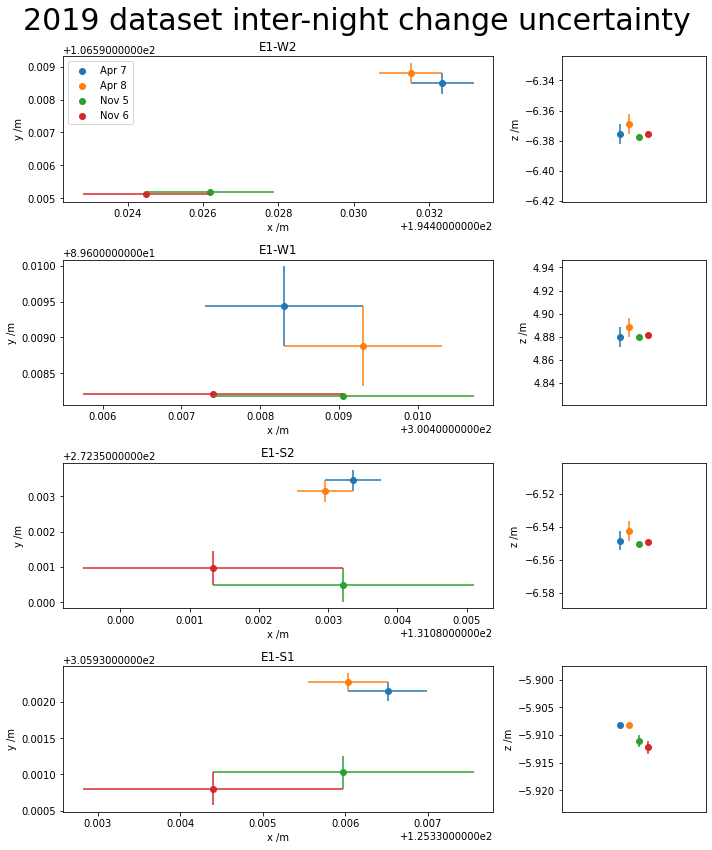

In [3]:
fig, ax = plt.subplots(4,2, figsize=(10,12), gridspec_kw={'width_ratios': [3, 1]})

telescopes = ['W2', 'W1', 'S2', 'S1'] # , 'E2']

fig.set_tight_layout(True)
fig.suptitle('2019 dataset inter-night change uncertainty', fontsize=30)

i = 0 

for i, telescope in enumerate(telescopes):
    
    ax[i,0].scatter(beta_04_07[i,0], beta_04_07[i,1], label='Apr 7')
    ax[i,0].errorbar(beta_04_07[i,0], beta_04_07[i,1], xerr=(beta_04_08[i,0]-beta_04_07[i,0]), yerr=(beta_04_08[i,1]-beta_04_07[i,1]))
    ax[i,0].scatter(beta_04_08[i,0], beta_04_08[i,1], label='Apr 8')
    ax[i,0].errorbar(beta_04_08[i,0], beta_04_08[i,1], xerr=(beta_04_08[i,0]-beta_04_07[i,0]), yerr=(beta_04_08[i,1]-beta_04_07[i,1]))

    if i != 4:
        ax[i,0].scatter(beta_11_05[i,0], beta_11_05[i,1], label='Nov 5')
        ax[i,0].errorbar(beta_11_05[i,0], beta_11_05[i,1], xerr=(beta_11_06[i,0]-beta_11_05[i,0]), yerr=(beta_11_06[i,1]-beta_11_05[i,1]))
        ax[i,0].scatter(beta_11_06[i,0], beta_11_06[i,1], label='Nov 6')
        ax[i,0].errorbar(beta_11_06[i,0], beta_11_06[i,1], xerr=(beta_11_06[i,0]-beta_11_05[i,0]), yerr=(beta_11_06[i,1]-beta_11_05[i,1]))

    ax[0,0].legend()
    ax[i,0].set_title(f'E1-{telescope}')
    ax[i,0].set_xlabel('x /m')
    ax[i,0].set_ylabel('y /m')



    ax[i,1].scatter(0, beta_04_07[i,2])
    ax[i,1].errorbar(0, beta_04_07[i,2], yerr=(beta_04_08[i,2]-beta_04_07[i,2]))
    ax[i,1].scatter(1, beta_04_08[i,2])
    ax[i,1].errorbar(1, beta_04_08[i,2], yerr=(beta_04_08[i,2]-beta_04_07[i,2]))


    ax[i,1].set_xticks([])
    ax[i,1].set_ylabel('z /m')
    ax[i,1].margins(x=2, y =2)

    if i != 4:
        ax[i,1].scatter(2, beta_11_05[i,2])
        ax[i,1].errorbar(2, beta_11_05[i,2], yerr=(beta_11_06[i,2]-beta_11_05[i,2]))
        
        ax[i,1].scatter(3, beta_11_06[i,2])
        ax[i,1].errorbar(3, beta_11_06[i,2], yerr=(beta_11_06[i,2]-beta_11_05[i,2]))

plt.savefig('figures/2019-diff-night-uncertainty.png', dpi=600)

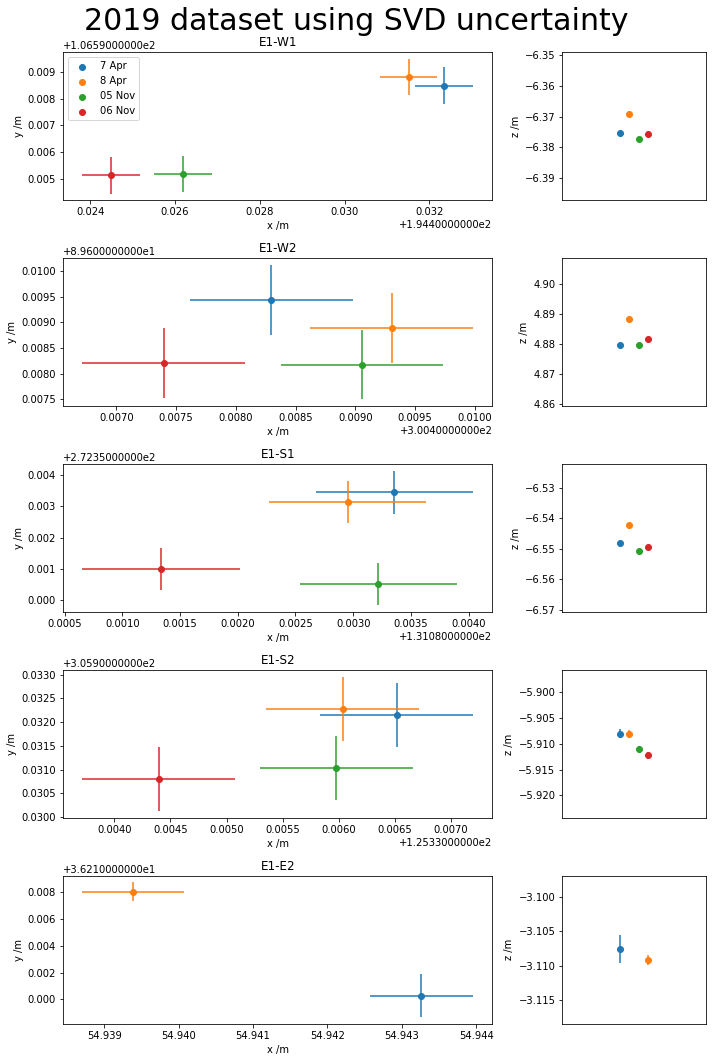

In [4]:
fig, ax = plt.subplots(5,2, figsize=(10,15), gridspec_kw={'width_ratios': [3, 1]})

telescopes = ['W1', 'W2', 'S1', 'S2', 'E2']

fig.suptitle('2019 dataset using SVD uncertainty', fontsize=30)

fig.set_tight_layout(True)

for i, telescope in enumerate(telescopes):
    
    ax[i,0].scatter(beta_04_07[i,0], beta_04_07[i,1], label='7 Apr')
    ax[i,0].scatter(beta_04_08[i,0], beta_04_08[i,1], label='8 Apr')
    ax[i,0].errorbar(beta_04_07[i,0], beta_04_07[i,1], xerr=sigma_04_07[i,0], yerr=sigma_04_07[i,1])
    ax[i,0].errorbar(beta_04_08[i,0], beta_04_08[i,1], xerr=sigma_04_08[i,0], yerr=sigma_04_08[i,1])
    
    if i != 4:
        ax[i,0].scatter(beta_11_05[i,0], beta_11_05[i,1], label='05 Nov')
        ax[i,0].scatter(beta_11_06[i,0], beta_11_06[i,1], label='06 Nov')
        ax[i,0].errorbar(beta_11_05[i,0], beta_11_05[i,1], xerr=sigma_11_05[i,0], yerr=sigma_11_05[i,1])
        ax[i,0].errorbar(beta_11_06[i,0], beta_11_06[i,1], xerr=sigma_11_06[i,0], yerr=sigma_11_06[i,1])
        
    ax[0,0].legend()
    ax[i,0].set_title(f'E1-{telescope}')
    ax[i,0].set_xlabel('x /m')
    ax[i,0].set_ylabel('y /m')
    
        
    ax[i,1].scatter(0, beta_04_07[i,2])
    ax[i,1].scatter(1, beta_04_08[i,2])
        
    ax[i,1].errorbar(0, beta_04_07[i,2], yerr=sigma_04_07[i,2])
    ax[i,1].errorbar(1, beta_04_08[i,2], yerr=sigma_04_08[i,2])
    
    ax[i,1].set_xticks([])
    ax[i,1].set_ylabel('z /m')
    ax[i,1].margins(x=2, y =2)
    
    if i != 4:
        ax[i,1].scatter(2, beta_11_05[i,2])
        ax[i,1].scatter(3, beta_11_06[i,2])
        ax[i,1].errorbar(2, beta_11_05[i,2], yerr=sigma_11_05[i,2])
        ax[i,1].errorbar(3, beta_11_06[i,2], yerr=sigma_11_06[i,2])
        
plt.savefig('figures/2019-SVD-uncertainty.png', dpi=600)

# 2012 

Since the 2012 data set can be much more sparse, need to check for degeneracies etc. 

In [7]:
df_2012 = pd.read_csv('data/2012_all_v2.csv')

good_days = find_good_days(df_2012)

good_days

[119, 132, 160, 165, 230, 231, 259, 274, 275, 305]

In [8]:
# number of data points for each 'good day'

l = []

for day in good_days:
    l.append(len(df_2012[df_2012.dayofyear==day]))
    
l

[186, 75, 75, 105, 105, 330, 360, 173, 270, 255]

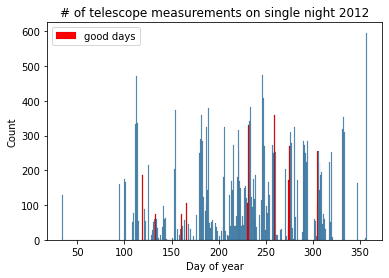

In [9]:
df_2012 = pd.read_csv('data/2012_all_v2.csv')

# first see what days have nice amounts of data
sns.histplot(df_2012.dayofyear, binwidth=1)
sns.histplot(df_2012[df_2012.dayofyear.isin(good_days)].dayofyear, binwidth=1, color='r', label='good days', alpha=1)
plt.title('# of telescope measurements on single night 2012')
plt.xlabel('Day of year')
plt.legend()
plt.savefig('figures/days-2012', dpi=600)

## Looking at the single-degenerate days in 2012

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(10,15), gridspec_kw={'width_ratios': [3, 1]})

telescopes = ['W2', 'W1', 'S2', 'S1', 'E2']

fig.suptitle('2012 Single good days', fontsize=30)

fig.set_tight_layout(True)

i = 0
telescope = 'W2'

for i, telescope in enumerate(telescopes):
    
    ax[i,0].scatter(beta_04_07[i,0], beta_04_07[i,1], label='7 Apr', color='black')
    ax[i,0].scatter(beta_04_08[i,0], beta_04_08[i,1], label='8 Apr', color='black')
    ax[i,0].errorbar(beta_04_07[i,0], beta_04_07[i,1], xerr=sigma_04_07[i,0], yerr=sigma_04_07[i,1], color='black')
    ax[i,0].errorbar(beta_04_08[i,0], beta_04_08[i,1], xerr=sigma_04_08[i,0], yerr=sigma_04_08[i,1], color='black')
    
    if i != 4:
        ax[i,0].scatter(beta_11_05[i,0], beta_11_05[i,1], label='05 Nov', color='yellow')
        ax[i,0].scatter(beta_11_06[i,0], beta_11_06[i,1], label='06 Nov', color='yellow')
        ax[i,0].errorbar(beta_11_05[i,0], beta_11_05[i,1], xerr=sigma_11_05[i,0], yerr=sigma_11_05[i,1], color='yellow')
        ax[i,0].errorbar(beta_11_06[i,0], beta_11_06[i,1], xerr=sigma_11_06[i,0], yerr=sigma_11_06[i,1], color='yellow')
        
    ax[0,1].legend(loc='upper right')
    ax[i,0].set_title(f'E1-{telescope}')
    ax[i,0].set_xlabel('x /m')
    ax[i,0].set_ylabel('y /m')
    
    for j, day in enumerate(good_days):

        df_temp = df_2012[df_2012.dayofyear == day]
        #df_temp = df[(day - 2 < df.dayofyear) & (df.dayofyear < day + 2)]

        design_mat, pinv, y, beta = create_design_mat(df_temp)
        sigma = svd_uncertainty(design_mat, y, beta)[:15].reshape(5,3)
        #sigma= np.maximum(sigma, np.sqrt(3)*0.0006807973948568247)
        beta = beta[:15].reshape(5,3)


        ax[i,0].scatter(beta[i,0], beta[i,1], label=f'{np.median(df_temp.dayofyear.values)}')
        ax[i,0].errorbar(beta[i,0], beta[i,1], xerr=sigma[i,0], yerr=sigma[i,1])

        ax[i,1].scatter(4+j, beta[i,2], label=f'{np.median(df_temp.dayofyear.values)}')
        ax[i,1].errorbar(4+j, beta[i,2], yerr=sigma[i,2])
    
        
    ax[i,1].scatter(0, beta_04_07[i,2], label='7 Apr', color='black')
    ax[i,1].scatter(1, beta_04_08[i,2], label='8 Apr', color='black')
        
    ax[i,1].errorbar(0, beta_04_07[i,2], yerr=sigma_04_07[i,2], color='black')
    ax[i,1].errorbar(1, beta_04_08[i,2], yerr=sigma_04_08[i,2], color='black')
    
    ax[i,1].set_xticks([])
    ax[i,1].set_ylabel('z /m')
    ax[i,1].margins(x=2, y =2)
    
    if i != 4:
        ax[i,1].scatter(2, beta_11_05[i,2], label='5 Nov', color='yellow')
        ax[i,1].scatter(3, beta_11_06[i,2], label='6 Nov', color='yellow')
        ax[i,1].errorbar(2, beta_11_05[i,2], yerr=sigma_11_05[i,2], color='yellow')
        ax[i,1].errorbar(3, beta_11_06[i,2], yerr=sigma_11_06[i,2], color='yellow')
        
plt.savefig('figures/2012-single-good-days-extra.png', dpi=600)

In [290]:
df_temp = df[df.dayofyear == 239]

design_mat, pinv, y, beta = create_design_mat(df_temp)

beta = beta[:15].reshape(5,3)

np.min(abs(actual_locations_2005 - beta))

0.01791487048048168

# Creating table similar to one seen in 2005 paper

In [ ]:
beta

In [ ]:
df_04_07 = pd.read_csv('data/2019_11_05.csv')
df_04_08 = pd.read_csv('data/2019_11_06.csv')

In [ ]:
np.append(beta_04_07, np.zeros(3,)).reshape(-1,3)

In [ ]:
beta_04_07 # this is in the order [E1, W2, W1, S2, S1, E2]

In [ ]:
np.linalg.norm(beta_04_07, axis=1)

In [688]:
def table(beta):
    baselines = []


    beta = np.append(beta, np.zeros(3,)).reshape(-1,3)

    for i in range(6):
        for j in range(1,6-i):
            baselines.append(beta[i] - beta[i+j])

    table = np.c_[baselines, np.linalg.norm(baselines, axis=1)]

    return np.around(table[table[:, 3].argsort()], decimals=3)

In [689]:
table(beta_04_07)

array([[ 5.74700e+00, -3.35790e+01, -6.40000e-01,  3.40730e+01],
       [ 5.49430e+01,  3.62100e+01, -3.10800e+00,  6.58760e+01],
       [-1.05976e+02,  1.69890e+01, -1.12550e+01,  1.07918e+02],
       [ 1.39489e+02,  7.03880e+01, -3.26800e+00,  1.56277e+02],
       [ 6.33490e+01, -1.65755e+02,  1.73000e-01,  1.77448e+02],
       [ 6.90960e+01, -1.99334e+02, -4.67000e-01,  2.10970e+02],
       [ 1.94432e+02,  1.06598e+02, -6.37500e+00,  2.21828e+02],
       [ 7.61400e+01,  2.36143e+02, -3.44100e+00,  2.48139e+02],
       [ 1.69325e+02, -1.82744e+02,  1.14280e+01,  2.49393e+02],
       [ 2.45465e+02,  5.33990e+01,  7.98700e+00,  2.51333e+02],
       [ 1.75072e+02, -2.16323e+02,  1.07880e+01,  2.78500e+02],
       [ 7.03930e+01,  2.69722e+02, -2.80100e+00,  2.78770e+02],
       [ 1.31083e+02,  2.72353e+02, -6.54800e+00,  3.02328e+02],
       [ 3.00408e+02,  8.96090e+01,  4.88000e+00,  3.13526e+02],
       [ 1.25337e+02,  3.05932e+02, -5.90800e+00,  3.30664e+02]])

In [686]:
# df = pd.read_csv('data/2005.csv')

# table_value = table(beta_04_07)

# df['East (m)'] = table_value[:,0]
# df['North (m)'] = table_value[:,1]
# df['Height (m)'] = table_value[:,2]
# df['Baseline (m)'] = table_value[:,3]

# df.to_csv('data/2005.csv', index_label=False)

In [ ]:
# have a look at the total stddev from the 2005 dataset throughout 2019

# How do the total (i.e. not component) baselines change over 2012

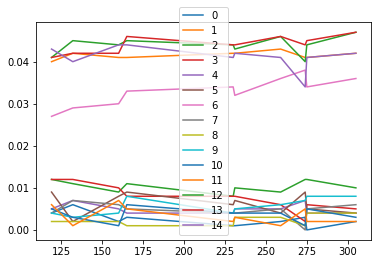

In [736]:
betas = [beta_04_07, beta_04_08, beta_11_05, beta_11_06]

df = pd.read_csv('data/groundtruth.csv')

l = []

for num in range(15):
    
    l = []

    for day in good_days:

        df_temp = df_2012[df_2012.dayofyear == day]

        _, _, _, beta = create_design_mat(df_temp)

        table_value = table(beta[:15].reshape(-1,3))

        diff = abs(df['Baseline (m)'] - table_value[:,3])

        diff = diff[diff < 1]

        l.append(diff[num])

    l

    plt.plot(good_days, l, label=num)
plt.legend()

In [792]:
df_2012[df_2012.dayofyear == 160]

utc     star  elevation   azimuth tel_1 tel_2 pop_1  \
3791  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E1    E2  P4B4   
3792  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E1    W1  P4B4   
3793  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E1    W2  P4B4   
3794  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E2    W1  P5B5   
3795  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E2    W2  P5B5   
...                       ...      ...        ...       ...   ...   ...   ...   
3861  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    E1  P2B2   
3862  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    E2  P2B2   
3863  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    W1  P2B2   
3864  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    W2  P2B2   
3865  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    W1    W2  P2B1   

     pop_2     cart_1     cart_2  year  month  day  dayofyear  
3791  P5B5  80.523810  69.404886  2012      6    8        160  
3792  P2B1  80.523810  23.014678  2012      6    8        160  
3793  P5B6  80.523810  77.999958  2012      6    8        160  
3794  P2B1  69.404886  23.014678  2012      6    8        160  
3795  P5B6  69.404886  77.999958  2012      6    8        160  
...    ...        ...        ...   ...    ...  ...        ...  
3861  P4B4   9.873192  17.454309  2012      6    8        160  
3862  P5B5   9.873192  27.176186  2012      6    8        160  
3863  P2B1   9.873192  70.644056  2012      6    8        160  
3864  P5B6   9.873192  87.999952  2012      6    8        160  
3865  P5B6  70.644056  87.999952  2012      6    8        160  

[75 rows x 14 columns]

In [794]:
design_mat, _, y, beta = create_design_mat(df_2012[df_2012.dayofyear == 160])

plt.plot(y - design_mat @ beta)

array([ 9.78612746e-08,  1.79510656e-05,  1.13633372e-05,  1.78532043e-05,
        1.12654759e-05, -4.56611397e-06, -4.46825268e-06, -7.97791879e-06,
        1.33849516e-05,  6.79722319e-06,  3.41180485e-06,  3.50966612e-06,
        2.13628704e-05,  1.47751420e-05, -6.58772842e-06, -4.80602367e-08,
       -8.81606515e-06, -5.58072377e-06, -8.76800492e-06, -5.53266353e-06,
        2.24249300e-06,  2.19443277e-06,  3.91808857e-06, -6.57357215e-06,
       -3.33823076e-06, -1.67559557e-06, -1.72365580e-06, -1.04916607e-05,
       -7.25631935e-06,  3.23534140e-06,  1.32190870e-07,  2.42483367e-05,
        1.53496197e-05,  2.41161458e-05,  1.52174288e-05, -6.16791598e-06,
       -6.03572509e-06, -1.07765895e-05,  1.80804207e-05,  9.18170367e-06,
        4.60867347e-06,  4.74086436e-06,  2.88570102e-05,  1.99582931e-05,
       -8.89871707e-06, -1.45077877e-07, -2.66125094e-05, -1.68461836e-05,
       -2.64674315e-05, -1.67011057e-05,  6.76927604e-06,  6.62419816e-06,
        1.18272901e-05, -

In [21]:
df_2012[df_2012.dayofyear==160]

utc     star  elevation   azimuth tel_1 tel_2 pop_1  \
3791  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E1    E2  P4B4   
3792  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E1    W1  P4B4   
3793  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E1    W2  P4B4   
3794  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E2    W1  P5B5   
3795  2012-06-08T06:45:33.000  #249051   0.857108  0.842695    E2    W2  P5B5   
...                       ...      ...        ...       ...   ...   ...   ...   
3861  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    E1  P2B2   
3862  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    E2  P2B2   
3863  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    W1  P2B2   
3864  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    S2    W2  P2B2   
3865  2012-06-08T08:41:13.000  #233793   1.104888  0.267180    W1    W2  P2B1   

     pop_2     cart_1     cart_2  year  month  day  dayofyear telpop_1  \
3791  P5B5  80.523810  69.404886  2012      6    8        160   E1P4B4   
3792  P2B1  80.523810  23.014678  2012      6    8        160   E1P4B4   
3793  P5B6  80.523810  77.999958  2012      6    8        160   E1P4B4   
3794  P2B1  69.404886  23.014678  2012      6    8        160   E2P5B5   
3795  P5B6  69.404886  77.999958  2012      6    8        160   E2P5B5   
...    ...        ...        ...   ...    ...  ...        ...      ...   
3861  P4B4   9.873192  17.454309  2012      6    8        160   S2P2B2   
3862  P5B5   9.873192  27.176186  2012      6    8        160   S2P2B2   
3863  P2B1   9.873192  70.644056  2012      6    8        160   S2P2B2   
3864  P5B6   9.873192  87.999952  2012      6    8        160   S2P2B2   
3865  P5B6  70.644056  87.999952  2012      6    8        160   W1P2B1   

     telpop_2  
3791   E2P5B5  
3792   W1P2B1  
3793   W2P5B6  
3794   W1P2B1  
3795   W2P5B6  
...       ...  
3861   E1P4B4  
3862   E2P5B5  
3863   W1P2B1  
3864   W2P5B6  
3865   W2P5B6  

[75 rows x 16 columns]

In [24]:
create_design_mat(df_2012[df_2012.dayofyear==160])[0].shape[1] - np.linalg.matrix_rank(create_design_mat(df_2012[df_2012.dayofyear==160])[0])

1

# Find a POP combination in all

Needs to be found in all the 2019 data sets

In [151]:
telescopes = ['E1','W2','W1','S2','S1','E2']
df = df_11_06

l = []

for telescope in telescopes:
    
    l.append(len(set(df[df.tel_1 == telescope].pop_1).union(set(df[df.tel_2 == telescope].pop_2))))
    
l

[7, 6, 10, 9, 9, 0]

In [869]:
l = []
telescope = 'E1'

for day in good_days:
    
    df = df_2012[df_2012.dayofyear == day]
    
    l.append(set(np.concatenate([df[df.tel_1 == telescope].pop_1, df[df.tel_2 == telescope].pop_2])))
    
#np.where(['P3B4' in element for element in l], 1, 0) * good_days
l

[{'P1B4', 'P3B4'},
 {'P1B4', 'P2B4'},
 {'P4B4'},
 {'P1B4', 'P4B4'},
 {'P3B4'},
 {'P3B4'},
 {'P2B4', 'P5B4'},
 {'P1B4', 'P5B4'},
 {'P1B4', 'P3B4'},
 {'P1B4', 'P3B4'}]

In [100]:
telescope = 'E1'

# pop_11_05 = set(np.concatenate([df_11_05[df_11_05.tel_1 == telescope].pop_1, df_11_05[df_11_05.tel_2 == telescope].pop_2]))
# pop_11_06 = set(np.concatenate([df_11_06[df_11_06.tel_1 == telescope].pop_1, df_11_06[df_11_06.tel_2 == telescope].pop_2]))
pop_04_07 = set(np.concatenate([df_04_07[df_04_07.tel_1 == telescope].pop_1, df_04_07[df_04_07.tel_2 == telescope].pop_2]))
pop_04_08 = set(np.concatenate([df_04_08[df_04_08.tel_1 == telescope].pop_1, df_04_08[df_04_08.tel_2 == telescope].pop_2]))

# these are the sets of POP settings we can do 
pop_04_07.intersection(pop_04_08)

{'P1B1', 'P3B1'}

In [134]:
telescope = 'E1'
df = df_04_08

set(df[df.tel_1 == telescope].pop_1).union(set(df[df.tel_2 == telescope].pop_2))

{'P1B1', 'P2B1', 'P3B1', 'P3B3', 'P3B4', 'P3B5'}

In [110]:
# E1 April P1B1-P3B1

beta = create_design_mat(df_04_07)[-1]

pop1 = beta[15] - beta[16]

beta = create_design_mat(df_04_08)[-1]

pop2 = beta[15] - beta[17]

pop2 - pop1

# 0.0006252826149193424

0.0006252826149193424

In [135]:
telescope = 'E1'
df = df_11_06

set(df[df.tel_1 == telescope].pop_1).union(set(df[df.tel_2 == telescope].pop_2))

{'P1B1', 'P1B2', 'P1B3', 'P1B4', 'P1B5', 'P1B6', 'P5B1'}

In [118]:
# E1 Nov P1B1-P5B1

beta = create_design_mat(df_11_05)[-1]

pop1 = beta[15] - beta[19]

beta = create_design_mat(df_11_06)[-1]

pop2 = beta[15] - beta[21]

pop2 - pop1

# 0.000847598053155707

0.000847598053155707

In [141]:
telescope = 'W2'
df = df_04_07

set(df[df.tel_1 == telescope].pop_1).union(set(df[df.tel_2 == telescope].pop_2))

{'P5B2'}

In [142]:
# W1 Apr P1B3-P2B3

beta = create_design_mat(df_04_07)[-1]

pop1 = beta[20] - beta[21]

beta = create_design_mat(df_04_08)[-1]

pop2 = beta[26] - beta[29]

pop2 - pop1

# -0.0005369108213528762

-0.0005369108213528762

In [157]:
telescope = 'S2'
df = df_11_05
set(df[df.tel_1 == telescope].pop_1).union(set(df[df.tel_2 == telescope].pop_2))

{'P1B4', 'P2B4', 'P3B4', 'P4B4', 'P5B4'}

In [158]:
# S2 Apr P2B4-P3B4

beta = create_design_mat(df_11_05)[-1]

pop1 = beta[27] - beta[28]

beta = create_design_mat(df_11_06)[-1]

pop2 = beta[38] - beta[42]

pop2 - pop1

# -0.000713398089999373

-0.000713398089999373

In [159]:
# 0.0006252826149193424, 0.000847598053155707, -0.0005369108213528762, -0.000713398089999373

np.mean([0.0006252826149193424, 0.000847598053155707, 0.0005369108213528762, 0.000713398089999373])
# between nights the pop settings move an average of 680microns
# this should be the minimum value for the error

0.0006807973948568247

In [48]:
U, w, Vt = np.linalg.svd(design_mat_04_07)

In [50]:
Vt[-1]

array([ 0.00000000e+00, -5.05631236e-16, -2.34049667e-17,  2.77838421e-16,
       -7.22980796e-16, -9.35993447e-16, -2.09628571e-16,  3.51187304e-17,
       -1.17017185e-15, -3.21040170e-16, -5.49113264e-16, -1.02508757e-15,
       -2.74116403e-16, -5.38077883e-16, -6.47516448e-16,  2.29415734e-01,
        2.29415734e-01,  2.29415734e-01,  2.29415734e-01,  2.29415734e-01,
        2.29415734e-01,  2.29415734e-01,  2.29415734e-01,  2.29415734e-01,
        2.29415734e-01,  2.29415734e-01,  2.29415734e-01,  2.29415734e-01,
        2.29415734e-01,  2.29415734e-01,  2.29415734e-01,  2.29415734e-01,
        2.29415734e-01,  2.29415734e-01])

In [880]:
df_04_07[(df_04_07.tel_2 == 'W1') & (df_04_07.pop_2 == 'P2B3')]

utc     star   azimuth  elevation tel_1 tel_2 pop_1  \
118   2019-11-05T02:45:46.000  #320010  0.625330   1.028486    E1    W1  P4B1   
123   2019-11-05T02:45:47.000  #320010  0.625289   1.028522    S2    W1  P2B4   
124   2019-11-05T02:45:47.000  #320010  0.625289   1.028522    S1    W1  P1B5   
127   2019-11-05T02:45:49.000  #320010  0.625209   1.028592    E1    W1  P4B1   
133   2019-11-05T02:45:50.000  #320010  0.625169   1.028627    S2    W1  P2B4   
...                       ...      ...       ...        ...   ...   ...   ...   
5017  2019-11-05T12:19:32.000  #105434  0.218767   1.314583    S2    W1  P1B4   
5018  2019-11-05T12:19:33.000  #105434  0.218584   1.314596    S1    W1  P1B5   
5021  2019-11-05T12:20:37.000  #105434  0.206786   1.315410    E1    W1  P2B1   
5026  2019-11-05T12:20:38.000  #105434  0.206601   1.315423    S2    W1  P1B4   
5027  2019-11-05T12:20:38.000  #105434  0.206601   1.315423    S1    W1  P1B5   

     pop_2     cart_1     cart_2  year  month  day  
118   P2B3  51.997529  52.579786  2019     11    5  
123   P2B3  25.215015  52.583025  2019     11    5  
124   P2B3  17.225689  52.583025  2019     11    5  
127   P2B3  51.973098  52.589496  2019     11    5  
133   P2B3  25.214626  52.592735  2019     11    5  
...    ...        ...        ...   ...    ...  ...  
5017  P2B3  53.862604  53.996687  2019     11    5  
5018  P2B3  13.574290  53.996687  2019     11    5  
5021  P2B3  36.559009  53.996716  2019     11    5  
5026  P2B3  53.352948  53.996716  2019     11    5  
5027  P2B3  13.058994  53.996716  2019     11    5  

[484 rows x 13 columns]

In [32]:
set(df_04_08[df_04_08.tel_1 == 'W1'].pop_1)

{'P1B3', 'P2B2', 'P2B3', 'P2B6', 'P4B3'}

In [51]:
df_04_07 = pd.read_csv('data/2019_04_07.csv')
df_04_08 = pd.read_csv('data/2019_04_08.csv')
df_11_05 = pd.read_csv('data/2019_11_05.csv')
df_11_06 = pd.read_csv('data/2019_11_06.csv')

In [94]:
beta = create_design_mat(df_11_05)[-1]

pop1 = beta[22] - beta[24]

beta = create_design_mat(df_04_08)[-1]

pop2 = beta[29] - beta[31]

pop2 - pop1

-0.0006833073667280587

# Overdetermined simple example 

Text(0, 0.5, '$\\beta_2$')

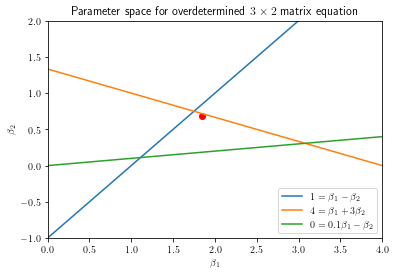

In [153]:
plt.rcParams['text.usetex'] = True
'''
lets form three equations equations in the form y = c_1*b_1 - c_2*b_2

1 = b_1 - b_2 

4 = b_1 + 3*b_2

0 = 0.1*b_1 - b_2

We can first see that this is overdetermined 

'''
b = np.linspace(0,5,100) 

plt.plot(b, b - 1, label=r'$1 = \beta_1 - \beta_2$')
plt.plot(b, (4-b)/3, label=r'$4 = \beta_1 + 3\beta_2$')
plt.plot(b, 0.1*b, label=r'$0 = 0.1\beta_1 - \beta_2$')
plt.xlim(0,4)
plt.ylim(-1,2)
plt.legend()

# can now form into matrix

y = np.array([1,4,0])

X = np.array([
    [1, - 1],
    [1, 3],
    [0.1, -1]
])

# have the equation y = Xb -> least squares b via pinverse
b_lse = np.linalg.pinv(X) @ y

plt.scatter(b_lse[0], b_lse[1], color='r')
plt.title(r'Parameter space for overdetermined $3 \times 2$ matrix equation')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
#plt.savefig('figures/overdetermined-example', dpi=600)

# Removing outliers

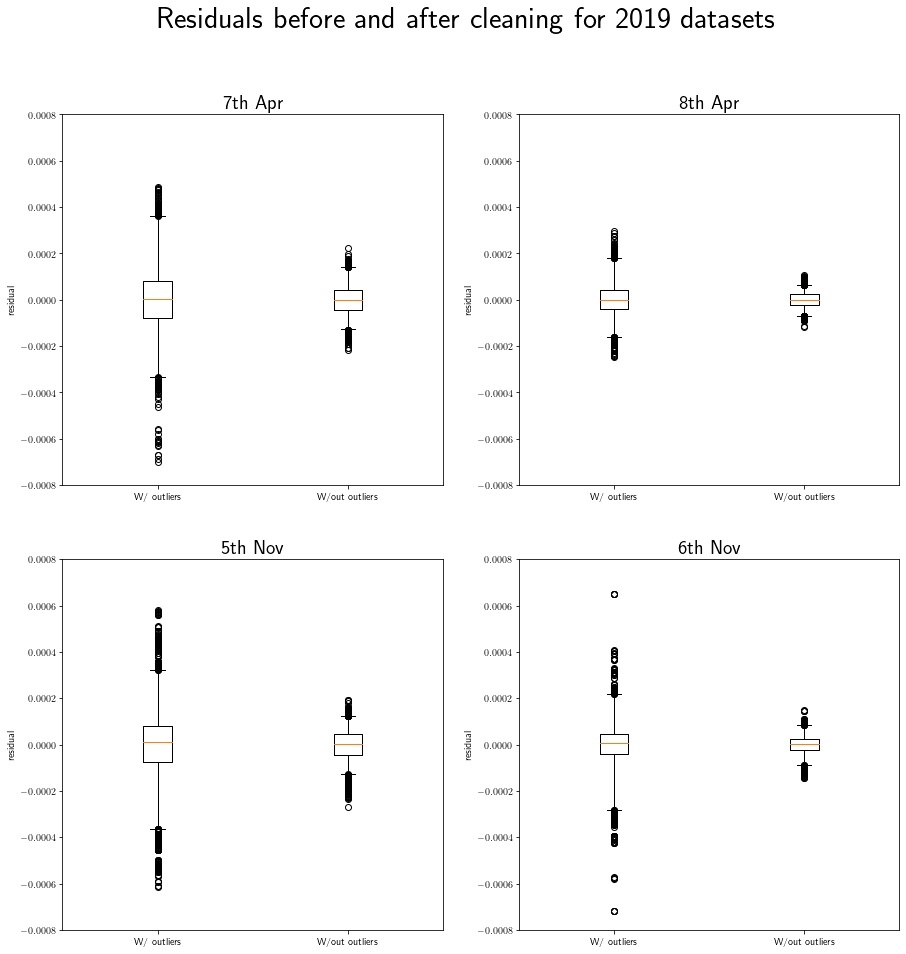

In [157]:
# REMOVE RESIDUALS FOR ALL 
from datetime import datetime 

dates = ['04_07', '04_08', '11_05', '11_06']

fig, ax = plt.subplots(2,2, figsize=(15,15))

fig.suptitle('Residuals before and after cleaning for 2019 datasets', fontsize=30)

j = 0

for i, date in enumerate(dates):
    
    if i > 1:
        j = 1
        i -= 2
    
    df = pd.read_csv(f'data/2019_{date}.csv')
    l = []
    
    design_mat, pinv, y, beta = create_design_mat(df)

    l.append(y - design_mat @ beta)

    df = remove_outliers(df, 1)

    design_mat, pinv, y, beta = create_design_mat(df)

    l.append(y - design_mat @ beta)
    x = ['with residuals', 'without residuals']
    
    ax[j,i].boxplot(l, whis=[2.5,97.5])
    ax[j,i].set_ylim([-0.0008,0.0008])
    ax[j,i].set_xticklabels(['W/ outliers','W/out outliers'])
    ax[j,i].set_ylabel('residual')
    
    date = datetime.strptime(date, '%m_%d').strftime('%dth %b')[1:]

    
    ax[j,i].set_title(f'{date}', fontsize=20)
    
#plt.savefig('removing-outliers.png')

# How sampling affects prediction and error

In [ ]:
# take only the data from April 7th

l = []

i = True

fracs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

colour = [frac/max(fracs) for frac in fracs]

for frac in fracs:
    
        df = pd.read_csv('data/2019_04_07.csv')

        df = df.sample(frac=frac)

        design_mat, pinv, y, beta = create_design_mat(df)
        sigma = svd_uncertainty(design_mat, y, beta)
        
        if sigma[0] < 0.1:

            l.append((sigma[0],sigma[1]))
            plt.scatter(beta[0], beta[1], label=f'{frac}')
            plt.errorbar(beta[0], beta[1], xerr=sigma[0], yerr=sigma[1])

plt.legend(title='Fraction')
plt.xlabel('E1-W2 x')
plt.ylabel('E1-W2 y')
plt.title('Prediction for E1-W2 baseline for different dataframe fractions', y=1.08)
plt.savefig('figures/different-sampling-fracs2.png', dpi=600, bbox_inches="tight")